In [ ]:
!pip install langchain
!pip install langchain_openai
!pip install openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 975.5/975.5 kB 22.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.8/332.8 kB 39.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.4/127.4 kB 18.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 145.0/145.0 kB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.9/45.9 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 327.5/327.5 kB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 53.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 10.0 MB/s eta 0:00:00


In [ ]:
import os
import pandas as pd

from IPython.display import Markdown, HTML, display
from langchain.schema import HumanMessage
from langchain_openai import AzureChatOpenAI



In [ ]:
from google.colab import userdata
AZURE_OPENAI_KEY = userdata.get('AZURE_OPENAI_ENDPOINT')


In [ ]:

# Ensure your API key is set in your environment variables
os.environ["AZURE_OPENAIAPI_KEY"] = AZURE_OPENAI_KEY


In [ ]:
# Initialize the AzureChatOpenAI client
model = AzureChatOpenAI(
    openai_api_version="2024-02-01",
    azure_deployment="gpt-35-turbo-16k",
    azure_endpoint="https://ai-explore1azureai1486566462541.openai.azure.com/",
    api_key=os.getenv("AZURE_OPENAIAPI_KEY")
)

In [ ]:
import pandas as pd

df = pd.read_csv("/content/OnlineRetail.csv", encoding='ISO-8859-1').fillna(value=0)


In [ ]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [ ]:
!pip install langchain_experimental

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.7/202.7 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 74.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.2/49.2 kB 6.7 MB/s eta 0:00:00


In [ ]:
from langchain.agents.agent_types import AgentType
from langchain_experimental.agents.agent_toolkits import create_pandas_dataframe_agent

agent = create_pandas_dataframe_agent(llm=model,df=df,verbose=False,allow_dangerous_code=True,handle_parsing_errors=True)



/usr/local/lib/python3.10/dist-packages/langchain_experimental/agents/agent_toolkits/pandas/base.py:282: UserWarning: Received additional kwargs {'handle_parsing_errors': True} which are no longer supported.
  warnings.warn(


In [ ]:
print(agent.invoke("how many rows are there?"))

{'input': 'how many rows are there?', 'output': '541,909'}


In [ ]:
agent.invoke("which month had the highest sales?")

{'input': 'which month had the highest sales?', 'output': 'November'}

In [ ]:
agent.invoke("which day of the week had the highest number of invoices printed?, Tell me the name of the day and the month")

{'input': 'which day of the week had the highest number of invoices printed?, Tell me the name of the day and the month',
 'output': 'Agent stopped due to iteration limit or time limit.'}



> Entering new AgentExecutor chain...
Thought: To plot a graph showing the number of invoices per month, I need to extract the month from the "InvoiceDate" column and count the number of occurrences for each month.
Action: I will use the pandas "to_datetime" function to convert the "InvoiceDate" column to datetime format. Then, I will use the pandas "dt.month" attribute to extract the month. Finally, I will use the pandas "value_counts" function to count the number of occurrences for each month.
Action Input: 
``` python_repl_ast
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
invoices_per_month = df['InvoiceDate'].dt.month.value_counts().sort_index()
invoices_per_month
```I will use the pandas "to_datetime" function to convert the "InvoiceDate" column to datetime format. Then, I will use the pandas "dt.month" attribute to extract the month. Finally, I will use the pandas "value_counts" function to count the number of occurrences for each month. is not a valid tool, try one of 

{'input': 'can you plot a graph showing the number of invoices per month?',
 'output': 'Yes, I can plot a graph showing the number of invoices per month.'}

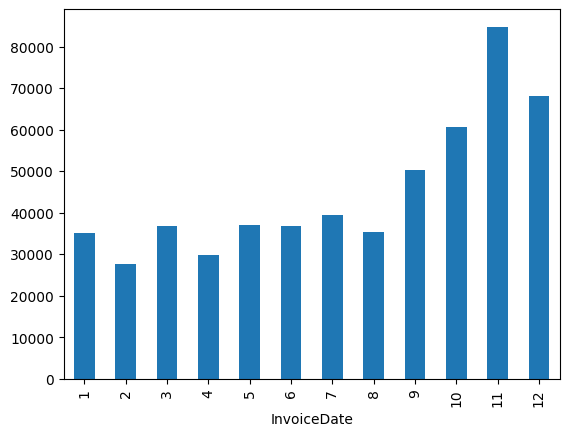

In [ ]:
agent.invoke("can you plot a graph showing the number of invoices per month?")

In [ ]:
agent.invoke("what was the value total sales for last month")



> Entering new AgentExecutor chain...
Thought: I need to find the total sales for last month. To do that, I need to filter the dataframe to include only the rows from the last month and then calculate the total sales by multiplying the quantity with the unit price for each row. 
Action: I will filter the dataframe for rows from the last month using the `pd.to_datetime` function and the `dt` accessor to access the month attribute of the `InvoiceDate` column. Then, I will calculate the total sales by multiplying the `Quantity` column with the `UnitPrice` column and summing the result.
Action Input: 
```python_repl_ast
import pandas as pd
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
last_month_sales = df[df['InvoiceDate'].dt.month == df['InvoiceDate'].dt.month.max()]['Quantity'] * df[df['InvoiceDate'].dt.month == df['InvoiceDate'].dt.month.max()]['UnitPrice']
total_sales = last_month_sales.sum()
total_sales
```I will filter the dataframe for rows from the last month using the `

{'input': 'what was the value total sales for last month',
 'output': 'Agent stopped due to iteration limit or time limit.'}